### Modal SNA MAP473D, Ecole Polytechnique, 2019-20

# TP4 - Processus de Poisson composés, transformation de Esscher, splitting et MCMC

Quelques rappels en python :

- `random.exponential` du module `numpy`. Pour la simulation de v.a. exponentielles. Attention à la convention sur les paramètres.
- `random.poisson` du module `numpy`. Pour la simulation de v.a. de Poisson.
- `poisson.sf` du module `scipy.stats`. Pour la fonction de survie d'une v.a. de Poisson.
- `random.standard_cauchy` du module `numpy`. Pour la simulation de v.a. de Cauchy standards.
- `cumsum` du module `numpy`.  Pour le calcul de la somme cumulée des éléments d'un tableau.
- `sort` du module `numpy`. Pour ordonner les éléments d'un tableau.
- `boxplot` du module `matplotlib.pyplot`. Pour tracer des boîtes à moustaches (boxplots).

Représentation d'un array `numpy` par un boxplot :  affichage d'une boîte rectangulaire délimitée par les premier et troisième quartiles ; la
  barre inétrieure (rouge) donne la médiane ; la "moustache" inférieure (resp. supérieure) va jusqu'à la
  valeur la plus petite (resp. grande) située entre le premier (resp. troisième) quartile et 1.5 fois la hauteur de la boîte ; les éventuels points de l'échantillon au-delà des moustaches sont représentés par des "+".

## 1. Processus  de Poisson homogènes et composés

### 1.1. Rappels : Processus de Poisson

Soit $\lambda >0$.
Un processus de Poisson homogène de paramètre $\lambda$ est un processus
$(N_t)_{t\geq 0}$ issu de $0$, à accroissement indépendants, tel que pour tout
$0 \leq s < t$, $N_t-N_s$ suit une loi de Poisson de paramètre $\lambda(t-s)$.

Ce processus peut être obtenu en posant
$$N_t = \textrm{Card}\{k\geq 1~: T_k\leq t\} = \sum_{k \geq 1} \mathbf{1}_{T_k \leq t}$$
où $T_k = T_{k-1} + E_k = E_1 + \cdots + E_k$,  pour des v.a. $(E_i)_{i \geq 1}$ i.i.d. de loi exponentielle de paramètre $\lambda$, et par convention $T_0 =0$.

Soit $\lambda >0$ et $\nu$ une loi de probabilité sur $\mathbb{R}$. Un processus
  de Poisson composé de paramètres $(\lambda, \nu)$ est un processus $(X_t)_{t\geq
  0}$ défini par
$$X_t = \sum_{k=1}^{N_t} Y_k,$$
où les sauts $(Y_k)_{k \geq 1}$ sont des v.a. réelles i.i.d. de loi $\nu$
indépendantes de $(N_t)_{t \geq 0}$, processus de Poisson homogène de paramètre
$\lambda$.

### 1.2. Simulations d'un processus  de Poisson homogène

##### Simulation d'une trajectoire sur $[0,T_n]$, $n$ fixé 
Utiliser le fait que 
$$N_t = \begin{cases}0&\textrm{pour $t\in [0, T_1[$,}\\
  1&\textrm{pour $t\in [T_1, T_2[$,}\\
  2&\textrm{pour $t\in [T_2, T_3[$,}\\
  \vdots &\quad\vdots\end{cases}$$
et que les instants de sauts $(T_k)_{1
  \leq k \leq n}$ s'expriment à l'aide de tirages de la loi exponentielle. 

#####  Simulation d'une trajectoire sur $[0,T]$, $T$ fixé 
Utiliser la loi de $N_T$ puis le fait que, conditionnellement à l'événement $\{N_T = k \}$, la loi des instants de sauts $(T_1, \cdots, T_k)$ est la loi de $k$ v.a. uniformes sur $[0,T]$ réordonnées (cf. Amphi 1). Pour l'affichage d'une fonction en escalier, on pourra utiliser la fonction `step` de `matplotlib.pyplot` (nous vous conseillons de consulter la documentation de cette fonction, notamment pour comprendre le rôle de son argument "`where`").  

##### Question 1
En utilisant ces deux approches, simuler et tracer sur une même figure une trajectoire d'un processus de Poisson homogène jusqu'à l'instant $T_n$ d'une part (pour $n\ge 1$ fixé), et une trajectoire jusqu'à l'instant $T$ d'autre part (pour $T>0$ fixé). On pourra par exemple prendre $n=30$, $\lambda=3$ et $T=n/\lambda=10$.

##### _Réponse :_

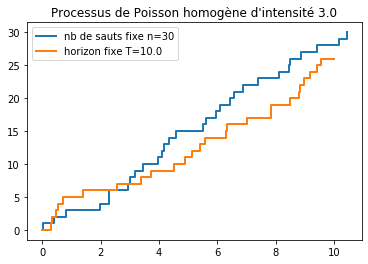

In [16]:
from numpy import zeros, cumsum, arange, append
from numpy.random import poisson, rand, exponential
from matplotlib.pyplot import figure, step, title, legend
###############################################################################
## Simulation jusqu'à T_n
###############################################################################
def homogeneous_poisson_until_Tn(la, n):    
    scale = 1. / la
    E = exponential(scale, size=n+1)
    E[0]=0
    events = cumsum(E)
    jumps = arange(n+1)
    return events, jumps

la = 3.
n = 30
events, jumps = homogeneous_poisson_until_Tn(la, n)
step(events, jumps, where="post", label="nb de sauts fixe n=%s"%n, linewidth=2.0)
###############################################################################
## Simulation jusqu'à T
###############################################################################
def homogeneous_poisson_until_T(la, T):
    N = poisson(T * la)
    events = T * rand(N+1)
    events[0] = 0
    events.sort()
    events = append(events,T)
    jumps = arange(N+1)
    jumps = append(jumps,N)
    return events, jumps

T=n/la
events, jumps = homogeneous_poisson_until_T(la, T)
step(events, jumps, where="post", label="horizon fixe T=%1.1f"%T, linewidth=2.0)
title("Processus de Poisson homogène d'intensité " + str(la), fontsize=12)
legend(loc="best")
None

##### Question 2  
Adapter le code précédent pour tracer deux trajectoires d'un processus de Poisson composé sur $[0,T]$ : pour la loi des sauts $(Y_k)_{k\ge 1}$, on envisagera successivement une loi exponentielle (par exemple de moyenne 2), puis la loi de la valeur absolue d'une v.a. de Cauchy standard.  Quelle différence remarque-t-on dans la régularité de l'amplitude des sauts ? 

##### _Réponse :_ 
L'amplitude des sauts est plus irrégulière pour des sauts de loi la valeur absolue d'une v.a. de Cauchy standard, ceci étant bien sûr dû au fait que $\mathbb{E}[Y_1]=+\infty$. Ce phénomène se voit d'autant mieux que l'on choisit $T$ grand dans le code ci-dessous. En effet, dans le cas de sauts exponentiels, en écrivant
$$\frac{X_t}{t}=\frac{N_t}{t}\times\frac{1}{N_t}\sum_{k=1}^{N_t} Y_k,$$
et en appliquant deux fois la loi des grands nombres, on peut montrer que 
$$\frac{X_t}{t}\xrightarrow[t\to\infty]{p.s.}\lambda\mathbb{E}[Y_1].$$
De fait, pour $t$ "grand", le processus X_t oscille autour de la droite de pente $\lambda\mathbb{E}[Y_1]$. 

A contrario, pour des sauts de loi la valeur absolue d'une v.a. de Cauchy standard, une généralisation de la loi des grands nombres assure en fait que, dans ce cas, la moyenne empirique des sauts tend p.s. vers l'infini :
$$\frac{1}{n}\sum_{k=1}^nY_k\xrightarrow[n\to\infty]{p.s.}+\infty$$
et le comportement est fondamentalement différent.

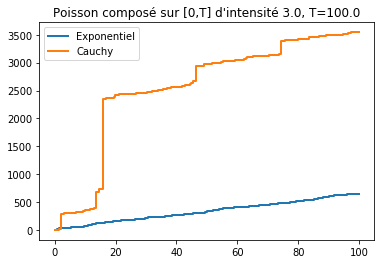

In [19]:
from numpy import zeros, cumsum, append
from numpy.random import poisson, rand, exponential, standard_cauchy
from matplotlib.pyplot import figure, step, title, legend

def compound_poisson_until_T(la, T, jumps_distribution="exponential",
                            scale_jumps=2.):
    N = poisson(T * la)
    events = T * rand(N+1)
    events[0] = 0
    events.sort()
    events = append(events,T)
    jumps = zeros(N+1)
    if jumps_distribution == "exponential":
        jumps[1:] = cumsum(exponential(scale_jumps, size=N))
    if jumps_distribution == "cauchy":
        jumps[1:] = cumsum(abs(standard_cauchy(size=N)))
    jumps = append(jumps,jumps[-1])
    return events, jumps

# Sauts exponentiels
la = 3. 
T = 100.
events, jumps = compound_poisson_until_T(la, T, "exponential")
step(events, jumps, where="post", linewidth=2.0)
title("Poisson composé sur [0,T] d'intensité " + str(la) + ", T=" + str(T))

# Sauts valeur absolue de Cauchy
events, jumps = compound_poisson_until_T(la, T, "cauchy")
step(events, jumps, where="post", linewidth=2.0)
legend(['Exponentiel', 'Cauchy'],loc="best")
None

## 2. Changement de probabilité pour les processus de Poisson  

Soient $\lambda >0$, $\nu$ une loi de probabilité sur $\mathbb{R}$, des v.a. réelles
  $(Y_k)_{k \geq 1}$ et un processus $(N_t)_{t \geq 0}$ définis sur l'espace
  probabilisable $(\Omega, \mathcal{F})$. On munit cet espace de la probabilité
  $\mathbb{P}$ telle que, sous $\mathbb{P}$, les v.a. $(Y_k)_{k \geq 1}$ sont i.i.d. de loi
  $\nu$ et indépendantes de $(N_t)_{t \geq 0}$, processus de Poisson homogène
  de paramètre $\lambda$.  Notons
 $$X_t = \sum_{k=1}^{N_t} Y_k.$$
  D'après la Section 1, sous $\mathbb{P}$, $(X_t)_{t \geq 0}$
  est un processus de Poisson composé de paramètres $(\lambda, \nu)$. Dans la
  suite, $\mathbb{E}$ et $\mathbb{V}$ désignent respectivement l'espérance et la variance sous $\mathbb{P}$.

  
 ### 2.1. Rappel de cours : la transformation de Esscher
 À toute fonction mesurable $f: \mathbb{R} \to \mathbb{R}$ telle que $ \mathbb{E}\left[ \exp(f(Y_1)) \right]< \infty$, on associe une loi de probabilité $\mathbb{P}_f$ sur
  $(\Omega, \mathcal{F})$ définie par
$$\mathbb{P}_f (A)=\mathbb{E}\left[ \mathbf{1}_A \ \exp\left\{ \sum_{k=1}^{N_T} f(Y_k) - \lambda T \left(  \mathbb{E}\left[ \exp(f(Y_1)) \right]-1 \right) \right\} \right] \qquad\qquad\qquad (1)$$
pour tout $A \in \mathcal{F}_T= \sigma\left(X_s, s \leq T \right)$.  Sous $\mathbb{P}_f$, $(X_t)_{t\geq 0 }$ est encore un processus de Poisson composé, mais de paramètres $(\lambda^f, \nu^f)$ donnés par (cf. Amphi 3)
  $$\lambda^f = \lambda \, \mathbb{E} \left[ \exp(f(Y_1))\right], \qquad \nu^f(dy)=\frac{\exp(f(y))}{\mathbb{E}\left[ \exp(f(Y_1)) \right]} \, \nu(dy).$$

### 2.2. Cas de sauts constants
  Dans cette section, on s'intéresse au calcul de $\mathbb{P}(X_T >x)$ pour de grandes valeurs $x$ dans le cas où $\nu$ est la mesure de Dirac en $\alpha>0$, c'est-à-dire $\mathbb{P}(Y_1 =\alpha) =1$. On a donc tout simplement $X_t = \alpha \,  N_t$ pour tout $t\geq 0$. Dans toute la suite, pour $\theta \in \mathbb{R}$, on notera respectivement  $\mathbb{P}_\theta,
 \nu^\theta, \lambda^\theta$ les quantités $\mathbb{P}_f, \nu^f, \lambda^f$
 introduites en Section 2.1 lorsque $f: y \mapsto \theta y$. Enfin,
 $\mathbb{E}_\theta$ et $\mathbb{V}_\theta$ désignent l'espérance et la variance sous $\mathbb{P}_\theta$.

##### Question 3 
Pour $\theta \in \mathbb{R}$, calculer la fonction log-laplace $\Gamma_T(\theta)$
    associée à $X_T$, définie par 
$$\Gamma_T(\theta)=\log\mathbb{E}[\exp({\theta X_T})].$$ 
En déduire l'espérance et la variance de $X_T$ sous $\mathbb{P}$.

##### _Réponse :_
D'après le cours (ou un calcul direct), on a 
$$\Gamma_T(\theta)=\lambda T(\mathbb{E}[\exp(\theta Y)]-1),$$
ce qui ici donne tout simplement
$$\Gamma_T(\theta) = \lambda T \left( \exp(\alpha \theta) - 1\right).$$
En particulier, on en déduit que
$$\mathbb{E}\left[X_T \right] = \Gamma'_T(0)= \lambda T \alpha\hspace{1cm}\mathrm{et}\hspace{1cm}\mathbb{V}(X_T) = \Gamma''_T(0) =  \lambda T \alpha^2.$$
Remarque : on peut noter que $\mathbb{E}\left[X_T \right]=\mathbb{E}\left[N_T \right]\times\mathbb{E}\left[Y \right]$, qui est un cas particulier de la formule de Wald.

##### Question 4  
Exprimer le changement de loi (1) à l'aide de $X_T, \theta$ et $\Gamma_T(\theta)$. Quelle est la loi de $(X_t)_{t \geq 0}$ sous $\mathbb{P}_\theta$, pour $\theta \in \mathbb{R}$ ? 

##### _Réponse :_
Pour tout $A \in \sigma\left(N_s, s \leq T\right)$,
$$\mathbb{P}_\theta(A) = \mathbb{E}\left[ \mathbf{1}_A \exp\left( \alpha \theta N_T -
        \Gamma_T(\theta) \right) \right] = \mathbb{E}\left[ \mathbf{1}_A \exp\left( \theta X_T -
        \Gamma_T(\theta) \right) \ \right],$$
et d'après le rappel, sous $\mathbb{P}_\theta$, $(X_t)_{t \geq 0}$ est un processus de Poisson composé de paramètres
$$\lambda^\theta = \lambda \exp(\alpha \theta)\hspace{1cm}\mathrm{et}\hspace{1cm} \nu^\theta \equiv
      \nu = \delta_\alpha.$$
Avec ce changement de loi, on ne change pas la loi des sauts, mais on augmente (resp. diminue) le nombre moyen de sauts en choisissant $\theta >0$ (resp. $\theta <0$).


##### Question 5 
Soit $\theta \in \mathbb{R}, T >0$. En déduire l'expression d'une v.a.
  $L_{\theta,T}$ telle que pour toute fonction mesurable positive $g :\mathbb{R} \rightarrow \mathbb{R}_{+}$ on ait
$$\mathbb{E}\left[ g(X_T) \right] = \mathbb{E}_\theta \left[ g(X_T) \frac{1}{L_{\theta,T}}\right]. \qquad\qquad\qquad (2)$$
En notant $I=\mathbb{E}\left[ g(X_T) \right]$, donner l'expression d'un estimateur par échantillonnage d'importance $\hat I_M^{IS}$ basé sur $M$ simulations i.i.d. $\tilde X_T^{(k)}$ sous $\mathbb{P}_\theta$. Montrer que $\hat I_M^{IS}$ est asymptotiquement normal, en explicitant la variance asymptotique $(\sigma^{IS})^2$. Proposer un estimateur $(\hat\sigma^{IS}_M)^2$ de cette variance en fonction des $\tilde X_T^{(k)}$ et en déduire un intervalle de confiance asymptotique à $95\%$ de $I$.

##### _Réponse :_
Dans la question précédente, en remplaçant $\mathbf{1}_A$ par $g(X_T)$, qui est bien $\mathcal{F}_T$-mesurable, il vient
$$\mathbb{E}_\theta[g(X_T)] = \mathbb{E}\left[ g(X_T) \exp\left( \alpha \theta N_T -
        \Gamma_T(\theta) \right) \right] = \mathbb{E}\left[ g(X_T) \exp\left( \theta X_T -
        \Gamma_T(\theta) \right) \ \right],$$
ce qui équivaut à
$$\mathbb{E}\left[g(X_T) \right] = \mathbb{E}_\theta \left[ g(X_T) \exp(-\theta X_T +  \Gamma_T(\theta)) \right],$$
donc $L_{\theta,T} = \exp(\theta X_T -  \Gamma_T(\theta))$.

A partir de $M$ simulations i.i.d. $\tilde X_T^{(k)}$ sous $\mathbb{P}_\theta$, l'estimateur Monte-Carlo par échantillonnage d'importance de $I=\mathbb{E}\left[ g(X_T) \right]$ s'écrit 
$$\hat I^{IS}_M  = \frac{1}{M} \sum_{k=1}^M g(\tilde X_T^{(k)})
        \exp(-\theta\tilde X_T^{(k)} + \Gamma_T(\theta)).$$
Par le théorème central limite, on a donc
$$\sqrt{M}\left(\hat I^{IS}_M-I\right)\xrightarrow[M\to\infty]{d}\mathcal{N}(0,(\sigma^{IS})^2),$$
avec
$$(\sigma^{IS})^2=\mathbb{V}_\theta\left(g(\tilde X_T)
        \exp(-\theta\tilde X_T + \Gamma_T(\theta))\right)=\mathbb{E}_\theta\left[g(\tilde X_T)^2
        \exp(-2\theta\tilde X_T + 2\Gamma_T(\theta))\right]-I^2$$
que l'on estime par sa variance empirique
$$(\hat \sigma^{IS}_M)^2=\frac{1}{M} \sum_{k=1}^M g(\tilde X_T^{(k)})^2 \exp(-2 \theta\tilde X_T^{(k)} + 2
      \Gamma_T(\theta)) - \left( \hat I^{IS}_M \right)^2.$$
La loi des grands nombres assure que c'est un estimateur consistant de $(\sigma^{IS})^2$. Par le lemme de Slutsky, un intervalle de confiance asymptotique à $95 \%$ de $I$ est donné par  
$$\left[\hat I^{IS}_M \pm 1.96 \frac{\hat\sigma_M^{IS}}{\sqrt{M}}\right].$$
Notons que $\hat\sigma_M^{IS}$ est l'écart-type empirique de l'échantillon des $g(\tilde X_T^{(k)})^2 \exp(-2 \theta\tilde X_T^{(k)} + 2\Gamma_T(\theta))$  et qu'il s'obtient donc en une ligne de code.

##### Question 6
Pour $x>\mathbb{E}[X_T]$, résoudre l'équation $\Gamma'_T(\theta)=x$ sur $\mathbb{R}$. On notera $\theta_x$ cette solution.

##### _Réponse :_
On trouve $\theta_x = \alpha^{-1} \log(x / (\lambda T \alpha))$. Puisque, sous $\mathbb{P}_\theta$, $(X_t)_{t \geq 0}$ est un processus de Poisson composé de paramètres $\lambda^\theta = \lambda \exp(\alpha \theta)$ et $\nu^\theta= \delta_\alpha$, ceci revient bien à dire que $\theta_x$ est choisi de sorte qu'on ait exactement $\mathbb{E}_{\theta_x}[X_T]=x$. Autrement dit, le nouveau processus de Poisson composé est fait pour atteindre, en moyenne, la valeur $x$ à la date $T$.

### 2.3. Application
Les processus de Poisson composés sont souvent utilisés pour modéliser l'état de la comptabilité des compagnies d'assurance. En effet, si une compagnie d'assurance de capital initial $C$ reçoit à chaque unité de temps des cotisations d'une valeur de $\Lambda$ et doit
effectuer des dédommagements de loi $\nu$ répartis dans le temps selon un processus de Poisson d'intensité $\lambda$, alors ses liquidités, à toute date $t$,
sont données par $$C+\Lambda t-X_t,$$
où $X_t$ est un processus de Poisson composé d'intensité $\lambda$ et de sauts de loi $\nu$. Afin d'éviter le risque de faillite, la compagnie d'assurance est alors amenée à évaluer $\mathbb{P}(X_T>x)$ pour des valeurs de $x$ élevées.

##### Question 7  
Les valeurs de $x$ qui rendent l'événement $\{X_T>x\}$ rare sous $\mathbb{P}$
  seront de la forme
$$x=\mathbb{E}[X_T]+\rho\sqrt{\mathbb{V}(X_T)}, \qquad\qquad\qquad (3)$$
pour $\rho>0$ grand. 
Comparer la méthode de Monte-Carlo naïve et la méthode d'échantillonnage d'importance issue de la relation (2) lorsque $\theta = \theta_x$ de la question 6 : observer la consistance des estimateurs et donner des intervalles de confiance asymptotiques de la quantité $I=\mathbb{P}(X_T>x)$ pour chaque méthode. On prendra $T=1$, $\lambda=1$, $\nu= \delta_\alpha$ pour $\alpha =0.5$ et $x$ donné par (3) pour $\rho =1$, $\rho=5$ et $\rho =20$.

##### _Réponse :_
Commençons par remarquer que, puisque $X_T=\alpha N_T$ avec $N_T$ suivant une loi de Poisson de paramètre $\lambda T$, la probabilité $I=\mathbb{P}(X_T>x)=\mathbb{P}(N_T>x/\alpha)$ s'obtient directement en une ligne de code. Le but ici est de comparer les deux méthodes d'estimation.

L'estimateur Monte-Carlo naïf s'écrit 
$$\hat I^{MC}_M  = \frac{1}{M} \sum_{k=1}^M \mathbf{1}_{N_T^{(k)} > x/\alpha}$$
où les $N_T^{(k)}$ sont des v.a. i.i.d. de Poisson de paramètre $\lambda T$. Par le théorème central limite, on a donc
$$\sqrt{M}\left(\hat I^{MC}_M-I\right)\xrightarrow[M\to\infty]{d}\mathcal{N}(0,(\sigma^{MC})^2),$$
avec
$$(\sigma^{MC})^2=\mathbb{V}(\mathbf{1}_{N_T > x/\alpha})=I(1-I),$$
que l'on estime par sa variance empirique, qui ici n'est rien d'autre que
$$(\hat \sigma^{MC}_M)^2=\hat I^{MC}_M(1-\hat I^{MC}_M).$$
Par le lemme de Slutsky, un intervalle de confiance asymptotique à $95 \%$ est donc  
$$\left[\hat I^{MC}_M \pm 1.96 \frac{\hat\sigma_M^{MC}}{\sqrt{M}}\right].$$


Proba théorique = 8.030e-02 

M = 1.000e+03 

Estimateur MC naïf = 7.700e-02

Intervalle de confiance asymptotique à 95% : +/- 1.652e-02

Erreur relative*100 = 41.15 



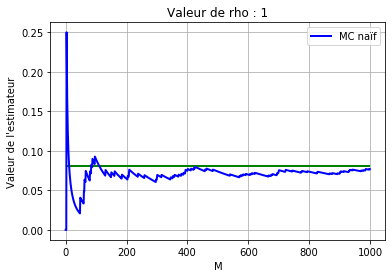

In [32]:
from numpy import sqrt, zeros, cumsum, arange, mean, std
from numpy.random import poisson
import matplotlib.pyplot as plt
import scipy.stats as sps

la = 1.0
T = 1.0
alpha = 0.5
esperance = la*T*alpha
variance = la*T*alpha**2
rho = 1 # 1, 5, 20
M=int(1e3)
x = esperance + rho*sqrt(variance)
seuil = x/alpha
valeur_theorique = sps.poisson.sf(seuil,mu=la*T)

N_mc = poisson(lam=la*T, size=M)
estim_mc = N_mc>seuil
estim_mc_cum = cumsum(estim_mc)/arange(1,M+1,dtype=float)
p_MC=mean(estim_mc)
erreur_MC = 1.96*sqrt(p_MC*(1-p_MC)/M) 
##############################
# Affichage d'une trajectoire
##############################
plt.plot(estim_mc_cum,'b', linewidth=2.)
plt.hlines(valeur_theorique, 0, M, 'g', linewidth=2.)
plt.title("Valeur de rho : " + str(rho))
plt.legend(['MC naïf'], loc="best")
plt.xlabel("M")
plt.ylabel("Valeur de l'estimateur")
plt.grid()
##############################
# Affichages numériques
##############################
print("Proba théorique = %1.3e \n" %valeur_theorique)
print("M = %1.3e \n" %M)
print("Estimateur MC naïf = %1.3e\n" %p_MC)
print("Intervalle de confiance asymptotique à 95%% : +/- %1.3e\n" %erreur_MC)
print("Erreur relative*100 = %1.2f \n" %(100*2*erreur_MC/valeur_theorique))

D'après la question 5, l'estimateur Monte-Carlo par échantillonnage d'importance s'écrit 
$$\hat I^{IS}_M  = \frac{1}{M} \sum_{k=1}^M \mathbf{1}_{\tilde N_T^{(k)} > x/\alpha}
        \exp(-\theta_x \, \alpha \tilde N_T^{(k)} + \Gamma_T(\theta_x))$$
où les $\tilde N_T^{(k)}$ sont cette fois des v.a. i.i.d. de Poisson de paramètre
      $\lambda T \exp(\alpha \theta_x)$. Par le théorème central limite, on a donc
$$\sqrt{M}\left(\hat I^{IS}_M-I\right)\xrightarrow[M\to\infty]{d}\mathcal{N}(0,(\sigma^{IS})^2),$$
avec
$$(\sigma^{IS})^2=\mathbb{V}_{\theta_x}\left(\mathbf{1}_{\tilde N_T > x/\alpha}
        \exp(-\theta_x \, \alpha \tilde N_T + \Gamma_T(\theta_x))\right)=\mathbb{E}_{\theta_x}\left[\mathbf{1}_{\tilde N_T > x/\alpha}
        \exp(-2\theta_x \, \alpha \tilde N_T + 2\Gamma_T(\theta_x))\right]-I^2$$
que l'on estime par sa variance empirique
$$(\hat \sigma^{IS}_M)^2=\frac{1}{M} \sum_{k=1}^M \mathbf{1}_{\tilde N_T^{(k)} >
        x/\alpha} \exp(-2 \theta_x \, \alpha \tilde N_T^{(k)} + 2
      \Gamma_T(\theta_x)) - \left( \hat I^{IS}_M \right)^2.$$
Toujours par le lemme de Slutsky, un intervalle de confiance asymptotique à $95 \%$ est donc  
$$\left[\hat I^{IS}_M \pm 1.96 \frac{\hat\sigma_M^{IS}}{\sqrt{M}}\right].$$
Rappelons que l'écart-type empirique $\hat\sigma_M^{IS}$ de l'échantillon des $\mathbf{1}_{\tilde N_T^{(k)} > x/\alpha}\exp(-\theta_x \, \alpha \tilde N_T^{(k)} + \Gamma_T(\theta_x))$ s'obtient simplement par la commande `std` du module `numpy`.

Proba théorique = 3.421e-22 

M = 1.000e+03 

Estimateur par échantillonnage d'importance = 2.823e-22

Intervalle de confiance asymptotique à 95% : +/- 6.108e-23

Erreur relative*100 = 35.70 



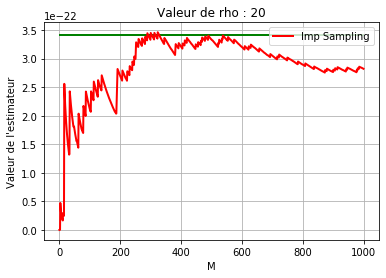

In [35]:
from numpy import sqrt, log, exp, zeros, cumsum, arange, mean, std
import matplotlib.pyplot as plt
import scipy.stats as sps
from numpy.random import poisson

la = 1.0
T = 1.0
alpha = 0.5
esperance = la*T*alpha
variance = la*T*alpha**2
rho = 20 # 1, 5, 20
M=int(1e3)

x = esperance + rho*sqrt(variance)
seuil = x/alpha
valeur_theorique = sps.poisson.sf(seuil,mu=la*T)
thetax = log(x/esperance)/alpha
GammaT = la*T*(exp(alpha*thetax) - 1)

N_is = poisson(lam=la*T*exp(alpha*thetax), size=M)
ratio_is = exp(-thetax*alpha*N_is + GammaT)
estim_is = ratio_is*(N_is>seuil)
estim_is_cum=cumsum(estim_is)/arange(1,M+1,dtype=float)
p_IS=mean(estim_is)
erreur_IS=1.96*std(estim_is)/sqrt(M)
##############################
# Affichage d'une trajectoire
##############################
plt.figure(1)
plt.plot(estim_is_cum,'r', linewidth=2.)
plt.hlines(valeur_theorique, 0, M, 'g', linewidth=2.)
plt.title("Valeur de rho : " + str(rho))
plt.legend(['Imp Sampling'], loc="best")
plt.xlabel("M")
plt.ylabel("Valeur de l'estimateur")
plt.grid()
##############################
# Affichages numériques
##############################
print("Proba théorique = %1.3e \n" %valeur_theorique)
print("M = %1.3e \n" %M)
print("Estimateur par échantillonnage d'importance = %1.3e\n" %p_IS)
print("Intervalle de confiance asymptotique à 95%% : +/- %1.3e\n" %erreur_IS)
print("Erreur relative*100 = %1.2f \n" %(100*2*erreur_IS/valeur_theorique))

## 3. Méthode de splitting et Processus de Poisson

### 3.1. Rappels de cours : méthode de splitting via MCMC

Soit $\mathbf{N} = (N_t)_{t \geq 0}$ un processus de Poisson homogène de paramètre $\lambda
$. Pour calculer la probabilité d'un événement rare de la forme $ \{ \Phi(\mathbf{N})
\leq a \}$ où $\Phi(\mathbf{N})$ désigne une fonctionnelle de la trajectoire du
processus de Poisson $(N_t)_{t \geq 0}$, la méthode de splitting consiste à
- choisir $K$ seuils : $a = a_K < \cdots < a_2 < a_1 < a_0 = +\infty$ ;
- pour tout $k =1, \cdots, K$, approcher $\mathbb{P}\left(\Phi(\mathbf{N}) \leq a_{k}
    \vert \Phi(\mathbf{N}) \leq a_{k-1} \right)$ par un estimateur $\hat{\pi}_k$. 
- estimer $\mathbb{P}(\Phi(\mathbf{N}) \leq a)$ par $\prod_{k=1}^K \hat{\pi}_k$.

Soit $k \in \{1, \cdots, K \}$ fixé. L'algorithme *MCMC pour loi conditionnelle* ci-dessous permet de produire une suite de processus de Poisson $\{\mathbf{N}^\ell, \ell \geq 0 \}$, vérifiant une loi forte des grands nombres : pour tout $b \in \mathbb{R}$, on a
$$\frac{1}{M} \sum_{\ell=1}^M \mathbf{1}_{\Phi(\mathbf{N}^\ell) \leq b}
 \quad \mathop{\longrightarrow}^{\mathrm{p.s.}}_{M \rightarrow \infty} \quad  \mathbb{P}\left(\Phi(\mathbf{N}) \leq b \ \vert\ \Phi(\mathbf{N})
  \leq a_{k-1} \right).$$
Plus précisément, cet algorithme construit une chaîne de Markov $\mathbf{N}^\ell$ à valeurs dans un espace de processus de Poisson, pour laquelle le théorème ergodique s'applique (pour plus de détails, on pourra consulter l'article [Rare event simulation using reversible shaking transformations](https://hal.archives-ouvertes.fr/hal-01058748/document)). Il peut donc être utilisé pour construire l'estimateur $\hat{\pi}_k$. 

Algorithme MCMC pour loi conditionnelle $\mathbb{P} (\cdot\ \vert\ \Phi(\mathbf{N})\leq a_{k-1})$} 
- Paramètres d'implémentation : $p \in ]0,1[$, $a_{k-1} \in \mathbb{R}$, $M \in \mathbb{N}$
- Initialisation : $\mathbf{N}^{0}$ un processus de Poisson homogène de paramètre
  $\lambda$ tel que $\Phi(\mathbf{N}^0) \leq a_{k-1}$.
- Pour $\ell = 0, \cdots, M-1$ : étant donné $\mathbf{N}^{\ell}$,

   (a) construire un candidat $\widetilde{\mathbf{N}}^{\ell+1}$ par *coloriage*, c'est-à-dire : garder chaque saut de $\mathbf{N}^\ell$ avec probabilité $p$, de manière indépendante : on obtient $\mathbf{N}^{\ell,p}$ ; construire un processus de Poisson homogène $\widetilde{\mathbf{N}}$ de paramètre $(1-p) \lambda$, indépendant de $\mathbf{N}^{\ell,p}$ ; renvoyer la somme $\widetilde{\mathbf{N}}^{\ell+1} := \mathbf{N}^{\ell,p} + \widetilde{\mathbf{N}}$.
   
   (b) si $\Phi(\widetilde{\mathbf{N}}^{\ell+1}) \leq a_{k-1}$, poser $\mathbf{N}^{\ell+1} =
    \widetilde{\mathbf{N}}^{\ell+1}$. Sinon,  poser $\mathbf{N}^{\ell+1} = \mathbf{N}^{\ell}$.
    
Remarque : L'algorithme *MCMC pour loi conditionnelle* est un algorithme de rejet : on rejette tous les candidats $\widetilde{\mathbf{N}}^{\ell+1}$ qui ne satisfont pas la condition $\Phi(\widetilde{\mathbf{N}}^{\ell+1}) \leq a_{k-1}$. Pour chacune des $K-1$ chaînes simulées par cet algorithme, il est intéressant d'observer l'évolution du taux d'acceptation le long de la trajectoire
$$M \mapsto \frac{1}{M} \sum_{\ell=1}^M \mathbf{1}_{\mathbf{N}^{\ell} = \widetilde{\mathbf{N}^{\ell}}}.$$
Comme nous allons le voir, ce taux d'acceptation dépend du paramètre $p$.    

### 3.2. Application

On reprend l'application décrite en Section 2.3, avec $\nu=\delta_\alpha$.

#### Question 8
Montrer que p.s.
$$\min_{0 \leq t \leq T} \left\{ C + \Lambda t - \alpha N_t \right\} = \min_{n
  \geq 0 \ \text{t.q.} \ T_n \leq T} \left\{ C + \Lambda T_n - \alpha n\right\}.$$

##### _Réponse :_
En notant que, pour tout $t \in [ T_j, T_{j+1}[$,
$$C + \Lambda t - \alpha \, N_{t} = C + \Lambda t - \alpha \, j = \left( C + \Lambda T_j -
  \alpha \, j \right) + \Lambda (t -T_j) \geq C + \Lambda T_j - \alpha \, j,$$
on en déduit l'égalité. Par conséquent, pour calculer le minimum des liquidités
le long d'une trajectoire sur $[0,T]$, il suffit de regarder les valeurs prises
par le processus des liquidités en les instants de sauts sur $[0,T]$.

#### Question 9 
On veut estimer la probabilité de ruine de l'assurance avant l'instant $T$, c'est-à-dire :
$$\mathbb{P}\left( \min_{0 \leq t \leq T} \left\{ C + \Lambda t - \alpha N_t \right\}
    \leq 0 \right).$$
On prendra $T=1$, $C= 100$, $\Lambda = 30$, $\alpha=30$, $a_k = C (1-(k/K)^2)$ et
   $(\lambda,K) =(1,3)$ ou $(\lambda, K) = (0.05,8)$. On envisagera différentes valeurs de $p\in\{0.1,0.2,\dots,0.9\}$.

(a) Implémenter l'algorithme de splitting combiné à l'algorithme *MCMC pour loi conditionnelle* pour estimer cette probabilité de ruine. Observer la consistance des estimateurs $\hat \pi_k$, $k=1, \cdots, K$, c'est-à-dire que ces sont des estimateurs convergents lorsque $M$ devient grand. Afficher l'évolution du taux d'acceptation. Dans le cas $(\lambda,K) =(1,3)$, on pourra prendre $M=1e4$ ; dans le cas $(\lambda, K) = (0.05,8)$, on pourra prendre $M=1e5$. On observera par exemple les différences entre $p=0.1$,  $p=0.5$  et $p=0.9$.

##### _Réponse :_

Sur les figures fournies par le programme suivant, on analyse une trajectoire de l'algorithme de splitting. Sur la première, on trace les estimateurs $\hat \pi_k$ en fonction du nombre de points $M$ de la chaîne. Sur la seconde, on trace l'évolution du taux d'acceptation le long de chaque chaîne.  
    
Lorsque $p=0.9$, les taux d'acceptation sont très élevés, mais le point proposé $\widetilde{\mathbf{N}}^{\ell+1}$ diffère peu du point courant $\mathbf{N}^{\ell}$. Par suite, pour chacune des $K-1$ chaînes, les valeurs successives d'une chaîne sont très corrélées. Dans le cas $\lambda=0.05$, il est flagrant que cette forte corrélation ralentit la convergence de la moyenne empirique $\hat\pi_k$. 

Lorsque $p=0.1$, le taux d'acceptation est assez faible, puisque le candidat $\widetilde{\mathbf{N}}^{\ell+1}$ diffère beaucoup du point courant $\mathbf{N}^{\ell}$ : la chaîne reste au même point pendant plusieurs itérations. La corrélation entre valeurs successives est donc là aussi élevée.

Les seuils successifs pour le splitting sont 	
[88.88888889 55.55555556  0.        ]


Lorsque p = 0.5 et lambda = 1
	 Chaîne 1 sur 3
	 Pour le niveau 1, la proba estimée est 4.94e-01
	 Chaîne 2 sur 3
	 Pour le niveau 2, la proba estimée est 2.59e-01
	 Chaîne 3 sur 3
	 Pour le niveau 3, la proba estimée est 4.82e-02


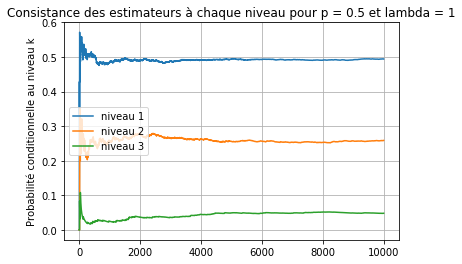

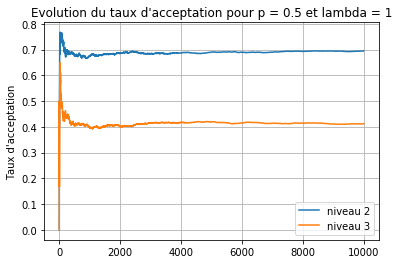


 La probabilité de ruine estimée est 6.16e-03

 Durée d'exécution 1.2992069721221924


In [47]:
from numpy import zeros, cumsum, arange, append, sort, concatenate
from numpy.random import poisson, rand
import matplotlib.pyplot as plt
import time

C = 100.0
Lambda  = 30.0
T = 1.0
alpha = 30.0

# Premier cas (lambda,K)=(1,3)
la,K,M = 1,3,int(1e4)
p=0.5

# Deuxième cas (lambda,K)=(0.05,8)
#la,K,M = 0.05,8,int(1e5)
#p=0.5

# Calcul des seuils successifs
ak = C*(1-((arange(K,dtype=float)+1)**2/K**2))
print("Les seuils successifs pour le splitting sont \t")
print(ak); print("\n")

TempsDepart = time.time()

print("Lorsque p = "+ str(p) +" et lambda = " + str(la))   
plt.clf()
        
##----------
# NIVEAU 1
##----------

NbRuine = zeros(M+1,dtype=float)
print("\t Chaîne 1 sur "+ str(K))
# Boucle pour simuler chaque processus
for n_chain in arange(M): 
    NumberJump = poisson(lam=la*T) # Nombre de sauts du processus de Poisson courant
    TimeJump = sort(T*rand(NumberJump))
    Reserve = C+Lambda*append(0,TimeJump)-alpha*arange(NumberJump+1)
    # on met à jour l'estimateur
    if min(Reserve)<=ak[0]:
        # on augmente le compteur
        NbRuine[n_chain+1] = NbRuine[n_chain]+1
        # on stocke ce processus comme possible point de départ pour la chaîne suivante
        PathPoissonInit = TimeJump
    else: 
        # on ne change pas le compteur
        NbRuine[n_chain+1] = NbRuine[n_chain]
# Affichage de l'estimateur de la proba pour ce niveau
ProbaEnd = NbRuine[-1]/M
print ("\t Pour le niveau 1, la proba estimée est %1.2e" %ProbaEnd)
# Visualisation de la consistance de l'estimateur
plt.figure(1)
plt.plot(NbRuine/(arange(M+1)+1), label="niveau 1") 

##----------
## BOUCLE POUR LES AUTRES NIVEAUX
##----------

for n_level in (1+arange(K-1)):
    print("\t Chaîne "+ str(n_level+1) + " sur " +str(K))
    NbRuine = zeros(M+1,dtype=float)
    RateAccept = zeros(M+1,dtype=float)
    PathPoisson = PathPoissonInit
    MinPath = zeros(M+1,dtype=float)
    MinPath[0] = min(C+Lambda*append(0,PathPoisson)-alpha*arange(len(PathPoisson)+1))
    for n_chain in arange(M):
        # Nombre de sauts dans le processus courant
        J = len(PathPoisson)
        # Sauts conservés
        JumpConserve = PathPoisson[rand(J)<=p]
        # Nombre de sauts ajoutés
        NbAjoute = poisson((1-p)*la*T)
        # Instants des sauts ajoutés
        NewJump = T*rand(NbAjoute)
        # Processus candidat à être la nouvelle valeur de la chaîne
        NewPathPoisson = sort(concatenate([NewJump,JumpConserve]))
        # Acceptation-rejet de ce candidat
        NewReserve = C+Lambda*append(0,NewPathPoisson)-alpha*arange(len(NewPathPoisson)+1,dtype=float)
        if min(NewReserve)<=ak[n_level-1]:    # on accepte
            PathPoisson = NewPathPoisson    # mise à jour de la chaîne
            MinPath[n_chain+1] = min(NewReserve)    # stockage valeur minimale
            RateAccept[n_chain+1] = RateAccept[n_chain]+1   # update du taux d'acceptation-rejet
        else:       # on refuse
            MinPath[n_chain+1] = MinPath[n_chain]   #   stockage valeur minimale
            RateAccept[n_chain+1] = RateAccept[n_chain] # update du taux d'acceptation-rejet
        # Calcul de l'estimateur de la probabilité
        if MinPath[n_chain+1]<=ak[n_level]:
            NbRuine[n_chain+1] = NbRuine[n_chain]+1
            PathPoissonInit = PathPoisson
        else:
            NbRuine[n_chain+1] = NbRuine[n_chain]
    ############
    # Affichage
    ############
    NewProbaEnd = NbRuine[-1]/M
    ProbaEnd = ProbaEnd*NewProbaEnd
    print ("\t Pour le niveau " + str(n_level+1) +", la proba estimée est %1.2e" %NewProbaEnd)    
    # Visualisation de la consistance de l'estimateur
    plt.figure(1)
    plt.plot(NbRuine/(arange(M+1,dtype=float)+1), label="niveau %1.0f" %(n_level+1))  
               
    # Visualisation de l'évolution du taux d'acceptation-rejet
    plt.figure(2)
    plt.plot(RateAccept/(arange(M+1,dtype=float)+1), label="niveau %1.0f" %(n_level+1)) 
    

plt.figure(1)
plt.title("Consistance des estimateurs à chaque niveau pour p = "+ str(p) +" et lambda = " + str(la))
plt.legend(loc="best")
plt.ylabel("Probabilité conditionnelle au niveau k")
plt.grid()

plt.figure(2)
plt.title("Evolution du taux d'acceptation pour p = "+ str(p) +" et lambda = " + str(la))
plt.ylabel("Taux d'acceptation")
plt.legend(loc="best")
plt.grid()

plt.show()
   
# Calcul de l'estimateur 
print("\n La probabilité de ruine estimée est %1.2e" %ProbaEnd)

TempsFin = time.time()
print("\n Durée d'exécution "+str(TempsFin-TempsDepart))

(b) Considérons (𝜆,𝐾)=(1,3), 𝑀=1𝑒3 et 𝑝∈{0.1,0.2,…,0.9}. Pour ces valeurs de 𝑝, illustrer par des boxplots la variabilité de l'estimateur de la probabilité de ruine à l'aide de plusieurs réalisations indépendantes de cet estimateur (par exemple 100). Calculer aussi pour chaque valeur de 𝑝 l'erreur relative, i.e. le ratio de l'écart-type et de la valeur moyenne de ces réalisations indépendantes. Quelles valeurs de 𝑝 préconiseriez-vous ? 

##### _Réponse :_
Pour le programme suivant, sur la première figure, on reporte les boxplots de $100$ réalisations indépendantes de l'estimateur de splitting en fonction de $p$. Sur la seconde figure, on trace l'évolution en fonction de $p$ de l'erreur relative (ratio de l'écart-type sur la moyenne) calculée à partir de $100$ réalisations indépendantes de l'estimateur $\prod_{k=1}^K \hat \pi_k$ de la probabilité de ruine. Il n'existe pas de résultats théoriques indiquant quel est le bon choix de $p$. Cependant, on peut ainsi vérifier que, sur cet exemple, des valeurs trop faibles ou trop élevées de $p$ ne sont pas optimales. 

les seuils successifs pour le splitting sont 	
[88.88888889 55.55555556  0.        ]
Lorsque p = 0.1 et lambda = 1
Lorsque p = 0.2 et lambda = 1
Lorsque p = 0.3 et lambda = 1
Lorsque p = 0.4 et lambda = 1
Lorsque p = 0.5 et lambda = 1
Lorsque p = 0.6 et lambda = 1
Lorsque p = 0.7 et lambda = 1
Lorsque p = 0.8 et lambda = 1
Lorsque p = 0.9 et lambda = 1


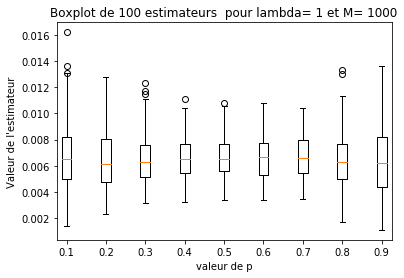

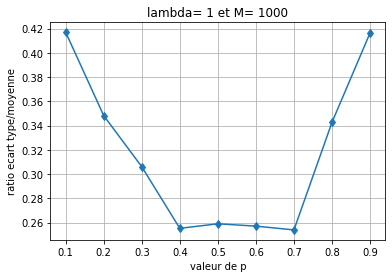

Durée d'exécution 58.837507247924805


In [48]:
from numpy import zeros, cumsum, arange, append, sort, concatenate, transpose, mean, std
from numpy.random import poisson, rand
import matplotlib.pyplot as plt
import time

plt.close()

C = 100.0
Lambda  = 30.0
T = 1.0
alpha = 30.0


la,K=1,3
pVecteur = [0.1,0.2,0.3,0.4, 0.5, 0.6,0.7,0.8, 0.9]
length_p = len(pVecteur)
LengthTrajVecteur=[int(1e3) for i in range(length_p)]

# Nombre de réalisations indépendantes de l'estimateur
NbAlgo = 100


# calcul des seuils successifs
ak = C*(1-((arange(K,dtype=float)+1)**2/K**2))
print("les seuils successifs pour le splitting sont \t")
print(ak)


TempsDepart = time.time()

StockProbaEnd = zeros((length_p,NbAlgo))
# Boucle sur les valeurs de p
for n_p in arange(length_p):
     p = pVecteur[n_p]
     LengthTraj = LengthTrajVecteur[n_p]
     print("Lorsque p = "+ str(p) +" et lambda = " + str(la))   
     plt.clf()
     
     # Boucle sur les differents runs independants
     for n_algo in arange(NbAlgo):
        #print("Run "+ str(n_algo+1)+ " sur " + str(NbAlgo))
        
        ##----------
        # NIVEAU 1
        ##----------
        NbRuine = zeros(LengthTraj+1)
        #Boucle pour simuler chaque processus
        #print("\t Chaîne 1 sur " + str(K))
        for n_chain in arange(LengthTraj):
            # nombre de sauts du processus de Poisson courant
            NumberJump = poisson(lam=la*T)
            TimeJump = sort(T*rand(NumberJump))
            Reserve = C+Lambda*append(0,TimeJump)-alpha*arange(NumberJump+1)
            # on met a jour l'estimateur
            if min(Reserve)<=ak[0]:
               # on augmente le compteur
                NbRuine[n_chain+1] = NbRuine[n_chain]+1
                # on stocke ce point de la chaîne comme possible point de départ pour la chaîne suivante
                PathPoissonInit = TimeJump
            else:
                # on ne change pas le compteur
                NbRuine[n_chain+1] = NbRuine[n_chain]
        #Estimateur de la proba pour ce niveau
        ProbaEnd = NbRuine[-1]/LengthTraj
        
            
        ## BOUCLE POUR LES AUTRES NIVEAUX
        for n_level in (1+arange(K-1)):
            #print("\t Chaîne "+ str(n_level+1)+ " sur " + str(K))
            NbRuine = zeros(LengthTraj+1)
            RateAccept = zeros(LengthTraj+1)
            PathPoisson = PathPoissonInit
            MinPath = zeros(LengthTraj+1)
            MinPath[0] = min(C+Lambda*append(0,PathPoisson)-alpha*arange(len(PathPoisson)+1))
            for n_chain in arange(LengthTraj):
                # Nombre de sauts dans le processus courant
                J = len(PathPoisson)
                # Quels sauts sont conservés
                JumpConserve = PathPoisson[rand(J)<=p]
                # Nombre de sauts ajoutés
                NbAjoute = poisson((1-p)*la*T)
                # Instants de sauts ajoutés
                NewJump = T*rand(NbAjoute)
                # Processus candidat à être la nouvelle valeur de la chaîne
                NewPathPoisson = sort(concatenate([NewJump,JumpConserve]))
                # Acceptation-rejet de ce candidat
                NewReserve = C+Lambda*append(0,NewPathPoisson)-alpha*arange(len(NewPathPoisson)+1)
                if min(NewReserve)<=ak[n_level-1]:    # on accepte
                    PathPoisson = NewPathPoisson    # mise à jour de la chaîne
                    MinPath[n_chain+1] = min(NewReserve)    # stockage valeur minimale
                    RateAccept[n_chain+1] = RateAccept[n_chain]+1   # mise à jour du taux d'acceptation-rejet
                else:       # on refuse
                    MinPath[n_chain+1] = MinPath[n_chain]   #   stockage valeur minimale
                    RateAccept[n_chain+1] = RateAccept[n_chain] # mise à jour du taux d'acceptation-rejet
                # Calcul de l'estimateur de la probabilité
                if MinPath[n_chain+1]<=ak[n_level]:
                    NbRuine[n_chain+1] = NbRuine[n_chain]+1
                    PathPoissonInit = PathPoisson
                else:
                    NbRuine[n_chain+1] = NbRuine[n_chain]
            
            NewProbaEnd = NbRuine[-1]/LengthTraj
            ProbaEnd = ProbaEnd*NewProbaEnd
               
            
 
        StockProbaEnd[n_p,n_algo] = ProbaEnd

plt.clf()
   
plt.figure(1)
plt.title("Boxplot de " + str(NbAlgo) +" estimateurs  pour lambda= " +str(la) + " et M= "+str(LengthTrajVecteur[0]))
plt.boxplot( transpose(StockProbaEnd), positions= [2*i+1 for i in range(length_p)], labels = [str(x) for x in pVecteur])
plt.xlabel("valeur de p")
plt.ylabel("Valeur de l'estimateur")


plt.figure(2)
M =  mean(StockProbaEnd, axis=1)
S =  std(StockProbaEnd, axis=1)
plt.plot(pVecteur, S/M, 'd-')
plt.xlabel("valeur de p")
plt.ylabel("ratio ecart type/moyenne")
plt.title("lambda= " +str(la)+ " et M= "+str(LengthTrajVecteur[0]))
plt.grid()

plt.show()

TempsFin = time.time()
print("Durée d'exécution "+str(TempsFin-TempsDepart))